we will use the historical data to evaluate the following data if shows significant differenct (confident level = 95%)

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

         date  conversion_rate
0  2024-12-01          0.13550
1  2024-12-02          0.19462
2  2024-12-03          0.13545
3  2024-12-04          0.22968
4  2024-12-05          0.12849


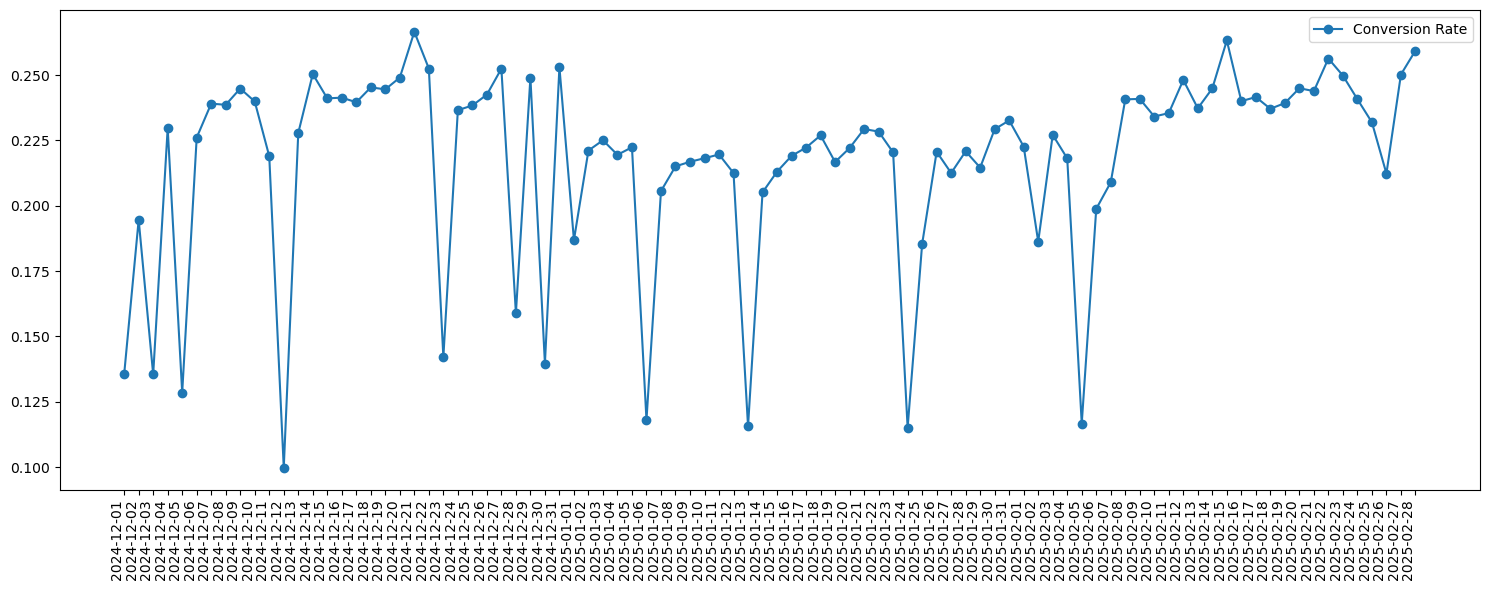

In [15]:
# check the data
df = pd.read_excel('sample_data.xlsx')
print(df.head())
plt.figure(figsize=(15, 6)) 
plt.plot(df['date'], df['conversion_rate'], marker='o', linestyle='-', label='Conversion Rate')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.legend()
plt.show()

In [24]:
# process the historical data
df1 = df[:60]
historical_data = df1['conversion_rate']

mean = historical_data.mean()
std = historical_data.std()
size = len(historical_data)
confident_level = 0.95

z_score = norm.ppf(1 - (1 - confident_level) / 2)
margin_of_error = z_score * std
lower_confident_boundary = mean - margin_of_error
upper_confident_boundary = mean + margin_of_error

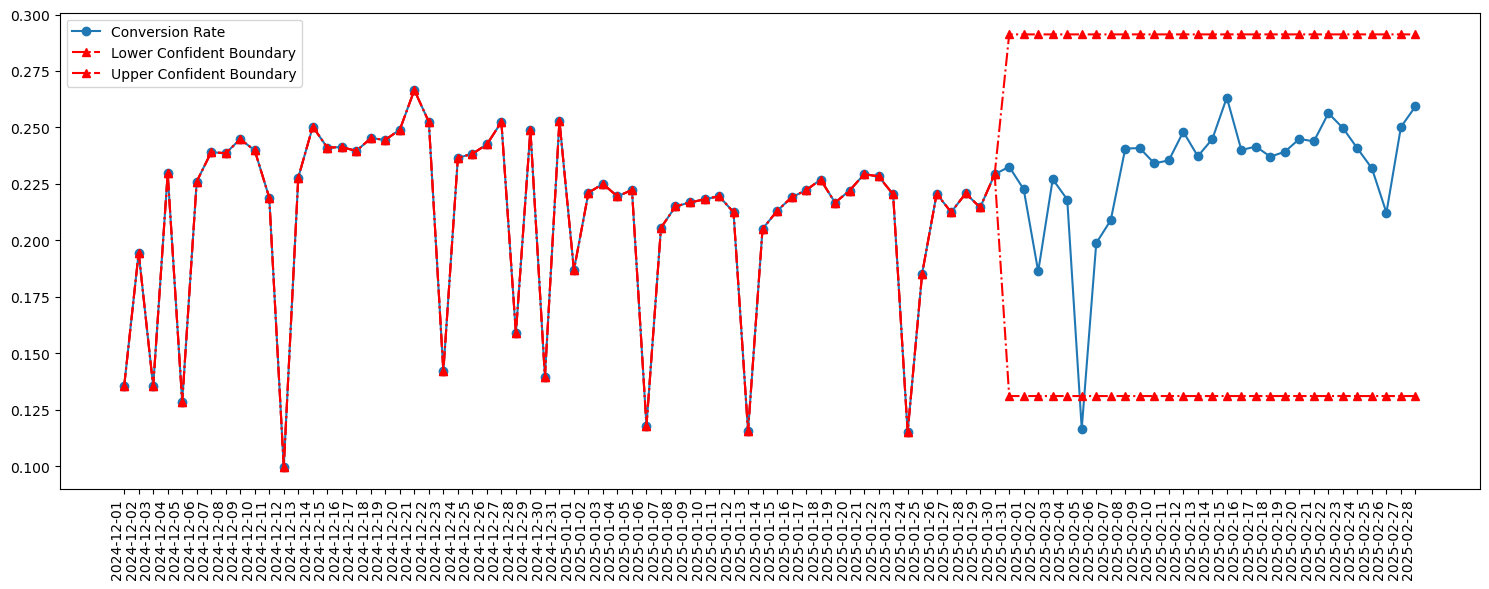

In [41]:
df2 = df
df['lower_confident_boundary'] = df['conversion_rate']
df['upper_confident_boundary'] = df['conversion_rate']

df.loc[61 : , 'lower_confident_boundary'] = [lower_confident_boundary for i in range(len(df.loc[61 : ]))]
df.loc[61 : , 'upper_confident_boundary'] = [upper_confident_boundary for i in range(len(df.loc[61 : ]))]

# draw a picture
plt.figure(figsize=(15, 6)) 
plt.plot(df['date'], df['conversion_rate'], marker='o', linestyle='-', label='Conversion Rate')
plt.plot(df['date'], df['lower_confident_boundary'], marker='^', color='red', linestyle='-.', label='Lower Confident Boundary')
plt.plot(df['date'], df['upper_confident_boundary'], marker='^', color='red', linestyle='-.', label='Upper Confident Boundary')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.legend()
plt.show()